In [14]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

In [15]:
# create file path
path_1 = os.path.join("Resources", "enter_2012.csv")
df = pd.DataFrame(pd.read_csv(path_1))
df.head()


C:\Users\ayoti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,9,11,12,14,18,20,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
0,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,...,Number of firms without paid employees,"Sales, receipts, or value of shipments of firm...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of paid empl...,Relative standard error of annual payroll (%),Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or..."
1,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,00,...,306704,12689088,0.2,0.7,0.3,0.7,1.2,0.8,0.2,1.5
2,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,30,...,223716,10610757,0.4,1.9,0.6,2.0,2.5,1.8,0.4,2.3
3,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,40,...,71109,1131644,0.6,5.8,5.7,7.9,9.9,13.0,0.6,7.0
4,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,50,...,3427,91896,7.7,44.1,16.7,49.6,14.2,18.0,8.0,8.4


In [16]:
#delete the first row in the dataframe 
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df.columns.name = None

In [66]:
#rename the columns and pick out data we need 
data = df.rename(columns = {"Geographic area name":"State","Meaning of 2012 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender_owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales"
                        })
#list the columns we need for analysis 
cols = [2,4,6,10,12,13,14,15,17,18,19]
new_data = data[data.columns[cols]]
new_data.head(100)

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
0,Alabama,Total for all sectors,All firms,All firms,374153,410217329,67449,397528241,57623419,306704,12689088
1,Alabama,Total for all sectors,All firms,White,279625,150946701,55909,140335944,25480546,223716,10610757
2,Alabama,Total for all sectors,All firms,Black or African American,73015,3087663,1907,1956020,436107,71109,1131644
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,3895,1291808,468,1199912,169299,3427,91896
4,Alabama,Total for all sectors,All firms,Asian,9353,4617052,3431,4305282,769114,5922,311771
5,Alabama,Total for all sectors,All firms,Asian Indian,2677,1977640,1733,1923420,308793,944,54221
6,Alabama,Total for all sectors,All firms,Chinese,1340,447485,616,411299,131137,723,36187
7,Alabama,Total for all sectors,All firms,Filipino,455,106963,126,99064,38124,329,7899
8,Alabama,Total for all sectors,All firms,Japanese,243,53048,23,48561,7402,219,4487
9,Alabama,Total for all sectors,All firms,Korean,1026,1361684,390,1322233,210297,635,39450


C:\Users\ayoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


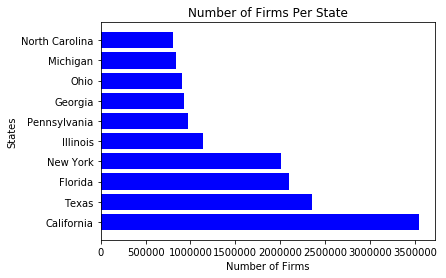

In [67]:
# make all values in the Number of firms Column integers
new_data['Number of Firms'] = new_data['Number of Firms'].astype(float)
#groupby state and maximum number of firms to extract total firms in each state
state_firms = new_data.groupby('State').agg({'Number of Firms':'max'})
#sort values in ascending order to get the 10 highest states
state_firms = state_firms.sort_values("Number of Firms", ascending=False)
#select the top 10 states 
state_firms = state_firms.head(10)
# reset index of the data frame
state_firms.reset_index(inplace=True)
# add all values to a list to plot bar chart
state_firms_x = state_firms["State"].tolist()
state_firms_y = state_firms["Number of Firms"].tolist()
#plot the bar chart for the 10 cities

plt.barh(state_firms_x, state_firms_y, color="b", align="center")

plt.title("Number of Firms Per State")
plt.ylabel("States")
plt.xlabel("Number of Firms")
plt.savefig("Output/Barcities.png")

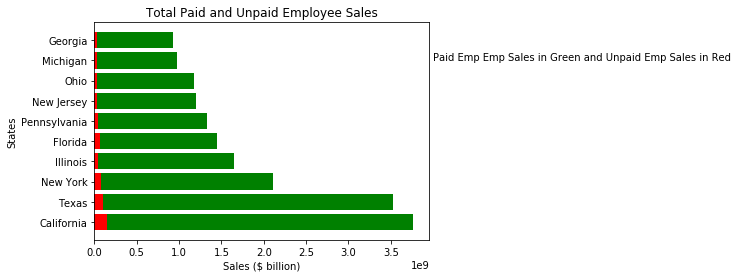

In [68]:
#change all values in the dataframe with "S" to 0
my_new_data = new_data.replace({'S': 0})
## make all values in the Paid Emp Sales and Unpaid Emp Firms Column integers
my_new_data['Paid Emp Sales'] = my_new_data['Paid Emp Sales'].astype(float)
my_new_data['Unpaid Emp Sales'] = my_new_data['Unpaid Emp Sales'].astype(float)
#groupby state and maximum number of Paid and Unpaid Employee Sales in each state
firm_sales = my_new_data.groupby('State').agg({'Paid Emp Sales':'max','Unpaid Emp Sales':'max'})

#sort values in ascending order to get the 10 highest states
firm_sales = firm_sales.sort_values("Paid Emp Sales", ascending=False)
#select the top 10 states
firm_sales = firm_sales.head(10)
# reset index of the data frame
firm_sales.reset_index(inplace=True)

#plot the line graph 
x_axis = firm_sales["State"]
paid_emp = firm_sales["Paid Emp Sales"]
unpaid_emp = firm_sales["Unpaid Emp Sales"]

paid_handle = plt.barh(x_axis, paid_emp, color='green')
unpaid_handle = plt.barh(x_axis, unpaid_emp, color='red')
plt.text(4000000000, 8,"Paid Emp Emp Sales in Green and Unpaid Emp Sales in Red")

plt.title("Total Paid and Unpaid Employee Sales")
plt.ylabel("States")
plt.xlabel("Sales ($ billion)")
plt.savefig("Output/Barsales.png")

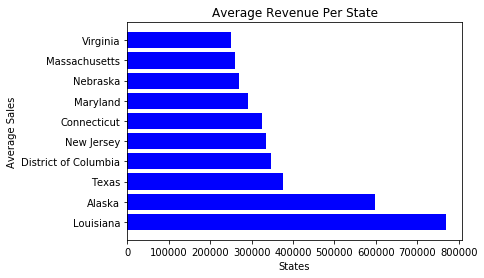

In [69]:
#create new column in master sheet with Avergage sales per firm
my_new_data['Total Firm Sales'] = my_new_data['Total Firm Sales'].astype(float)
my_new_data['Number of Firms'] = my_new_data['Number of Firms'].astype(float)
my_new_data["Average Sales"] = my_new_data["Total Firm Sales"] / my_new_data["Number of Firms"]
#groupby state and maximum Average to extract total firms in each state
average = my_new_data.groupby('State').agg({'Average Sales':'max'})
#sort values in ascending order to get the 10 highest states
average = average.sort_values("Average Sales", ascending=False)
#select the top 10 states 
average = average.head(10)
# reset index of the data frame
average.reset_index(inplace=True)
# add all values to a list to plot bar chart
average_x = average["State"].tolist()
average_y = average["Average Sales"].tolist()
#plot the bar chart for the 10 cities

plt.barh(average_x, average_y, color="b", align="center")

plt.title("Average Revenue Per State")
plt.xlabel("States")
plt.ylabel("Average Sales")
plt.savefig("Output/avgsales.png")

In [70]:
# Drop total firms for each sector in order to retrieve values for individual sectors
drop = new_data[new_data.Sector != "Total for all sectors"]

#drop = new_data.drop(index="Total for all sectors", columns=Sector)
drop.head()

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
136,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,All firms,5199.0,1310197,788,1087312,220111,4411,222885
137,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,White,4557.0,1121853,706,924452,187668,3852,197400
138,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,Black or African American,318.0,20843,30,S,S,288,11438
139,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,American Indian and Alaska Native,80.0,5749,2,S,S,78,4997
140,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,Asian,138.0,8930,0,0,0,138,8930


C:\Users\ayoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 20 artists>

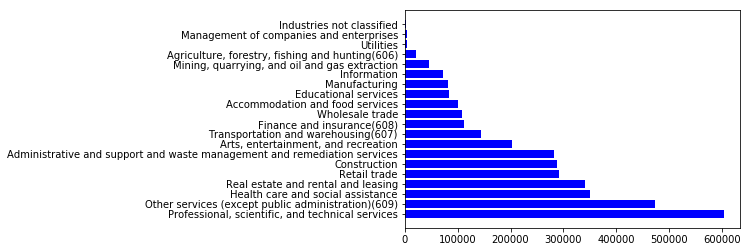

In [71]:
# Total number of firms per industry
drop["Number of Firms"] = drop["Number of Firms"].astype(float)
# groupby sector and maximum number of firms to retrtieve the maximum number of firms in each sector
sector_groupby = drop.groupby("Sector").agg({"Number of Firms": "max"})
sector_groupby = sector_groupby.sort_values("Number of Firms", ascending=False)
# reset index of the data frame
sector_groupby.reset_index(inplace=True)
sectors = sector_groupby["Sector"].tolist()
firms = sector_groupby["Number of Firms"].tolist()
#sector = pd.applySeries(sector_groupby)
plt.barh(sectors, firms, color="b")

In [99]:
#market cap for each sector
# Drop total firms for each sector in order to retrieve values for individual sectors
drop_s = my_new_data[new_data.Sector != "Total for all sectors"]

# Total number of firms per industry
drop_s["Total Firm Sales"] = drop_s["Total Firm Sales"].astype(float)
# groupby sector and maximum number of firms to retrtieve the maximum number of firms in each sector
sector_sales = drop_s.groupby("Sector").agg({"Total Firm Sales": "max"})
#sector_sales = sector_sales.sort_values("Total Firm Sales", ascending=False)
# reset index of the data frame
#sector_sales.reset_index(inplace=True)
sector_salesx = sector_sales["Sector"].tolist()
#firm_sales = sector_sales["Total Firm Sales"].tolist()
#plot pie chart
ind_sectors =  my_new_data[new_data.Sector != "Total for all sectors"] 
ind
plt.pie(sector_sales, labels=sector_salesx)

C:\Users\ayoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyError: 'Sector'

In [72]:
# Drop total firms for each race in order to retrieve values for individual races
drop2 = new_data[(new_data.Race != "All firms") & (new_data.Race !="All firms classifiable by gender, ethnicity, race, and veteran status")]
#drop = new_data.drop(index="All firms", columns=Sector)
drop2.head(100)

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
1,Alabama,Total for all sectors,All firms,White,279625.0,150946701,55909,140335944,25480546,223716,10610757
2,Alabama,Total for all sectors,All firms,Black or African American,73015.0,3087663,1907,1956020,436107,71109,1131644
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,3895.0,1291808,468,1199912,169299,3427,91896
4,Alabama,Total for all sectors,All firms,Asian,9353.0,4617052,3431,4305282,769114,5922,311771
5,Alabama,Total for all sectors,All firms,Asian Indian,2677.0,1977640,1733,1923420,308793,944,54221
6,Alabama,Total for all sectors,All firms,Chinese,1340.0,447485,616,411299,131137,723,36187
7,Alabama,Total for all sectors,All firms,Filipino,455.0,106963,126,99064,38124,329,7899
8,Alabama,Total for all sectors,All firms,Japanese,243.0,53048,23,48561,7402,219,4487
9,Alabama,Total for all sectors,All firms,Korean,1026.0,1361684,390,1322233,210297,635,39450
10,Alabama,Total for all sectors,All firms,Vietnamese,2912.0,385944,299,256184,22386,2614,129760


C:\Users\ayoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 21 artists>

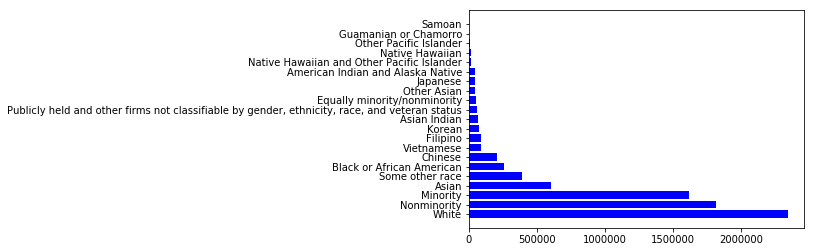

In [73]:
# Total number of firms per industry
drop2["Number of Firms"] = drop2["Number of Firms"].astype(float)
# groupby race and maximum number of firms to retrtieve the maximum number of firms in each sector
race_groupby = drop2.groupby("Race").agg({"Number of Firms": "max"})
race_groupby = race_groupby.sort_values("Number of Firms", ascending=False)
# reset index of the data frame
race_groupby.reset_index(inplace=True)
races = race_groupby["Race"].tolist()
firms2 = race_groupby["Number of Firms"].tolist()
#sector = pd.applySeries(sector_groupby)
plt.barh(races, firms2, color="b")

In [82]:
# Drop total firms for each race in order to retrieve values for individual races
#drop3 = new_data[(new_data.Gender_owned !="All firms") | (new_data.Gender_owned !="Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status") & (new_data.Gender_owned !="All firms classifiable by gender, ethnicity, race, and veteran status")]
drop3 = new_data[~(new_data.Gender_owned.isin(["All firms", "Publicly held and other firms not classifiable by gender, 
                                               ethnicity, race, and veteran status", "All firms classifiable by gender, ethnicity, race, and veteran status"]))]
#drop = new_data.drop(index="All firms", columns=Sector)
#drop3 = new_data[(new_data.Gender_owned !="All firms")] 
drop3.head(100)

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
50,Alabama,Total for all sectors,Female-owned,All firms,137630.0,17286337,11780,14778190,3315168,125850,2508147
51,Alabama,Total for all sectors,Female-owned,White,87445.0,15325057,10157,13477271,3031612,77288,1847786
52,Alabama,Total for all sectors,Female-owned,Black or African American,44914.0,796273,577,295648,101177,44337,500626
53,Alabama,Total for all sectors,Female-owned,American Indian and Alaska Native,2135.0,290908,199,261029,54520,1936,29879
54,Alabama,Total for all sectors,Female-owned,Asian,3816.0,911301,831,790902,144174,2986,120399
55,Alabama,Total for all sectors,Female-owned,Asian Indian,640.0,350279,295,332257,32543,345,18023
56,Alabama,Total for all sectors,Female-owned,Chinese,445.0,153840,176,143391,42352,269,10449
57,Alabama,Total for all sectors,Female-owned,Filipino,270.0,S,58,S,S,212,S
58,Alabama,Total for all sectors,Female-owned,Japanese,155.0,5713,4,3544,196,151,S
59,Alabama,Total for all sectors,Female-owned,Korean,577.0,178448,159,155596,34351,418,22852


C:\Users\ayoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 3 artists>

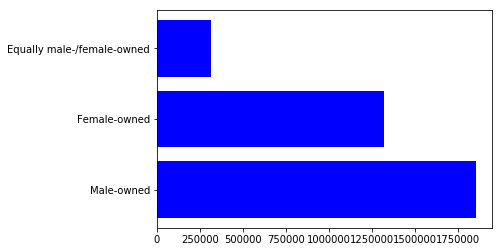

In [85]:
# Total number of firms per gender
drop3["Number of Firms"] = drop3["Number of Firms"].astype(float)
# groupby race and maximum number of firms to retrtieve the maximum number of firms for each gender
gender_groupby = drop3.groupby("Gender_owned").agg({"Number of Firms": "max"})
gender_groupby = gender_groupby.sort_values("Number of Firms", ascending=False)
# reset index of the data frame
gender_groupby.reset_index(inplace=True)
gender = gender_groupby["Gender_owned"].tolist()
firms3 = gender_groupby["Number of Firms"].tolist()
#sector = pd.applySeries(sector_groupby)
plt.barh(gender, firms3, color="b")